In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
def load_data():
    # Replace with your dataset file path if needed
    file_path = '/NHANES_age_prediction.csv'
    df = pd.read_csv(file_path)

    # If 'age_group' is not a column already, create it based on age
    # (You'll need to adjust the logic based on your dataset)
    if 'age_group' not in df.columns:
        df['age_group'] = pd.cut(df['age'], bins=[0, 65, float('inf')], labels=['non-senior', 'senior'])

    # Separate features (X) and target (Y)
    X = df[['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]
    Y = df[['age_group']]

    return X, Y

print("Loading data...")
X, Y = load_data()

Loading data...


In [ ]:
# Set plotting style
sns.set_style("whitegrid")
sns.set_context("talk")




In [ ]:
# Data Loading
# Note: In a real scenario, you would load your own dataset
# For demonstration, let's assume we're loading the NHANES dataset

In [ ]:
# Example of how the data might be loaded
def load_data():
    # In an actual scenario, you would replace this with the real data loading code
    # For example: df = pd.read_csv('nhanes_dataset.csv')

    # Based on your report, creating a simulated dataset with similar properties
    np.random.seed(42)
    n_samples = 2278

    # Create X DataFrame (Features)
    X = pd.DataFrame({
        'RIAGENDR': np.random.choice([0, 1], size=n_samples, p=[0.4865, 0.5135]),  # Male/Female
        'PAQ605': np.random.choice([0, 1], size=n_samples, p=[0.822, 0.178]),      # Physical activity (No/Yes)
        'BMXBMI': np.random.normal(28.5, 6.5, n_samples),                          # BMI
        'LBXGLU': np.random.normal(100, 25, n_samples),                            # Blood glucose
        'DIQ010': np.random.choice([0, 1], size=n_samples, p=[0.991, 0.009]),      # Diabetes diagnosis
        'LBXGH': np.random.normal(5.5, 1.0, n_samples),                            # Glycohemoglobin
        'LBXIN': np.clip(np.random.exponential(12, n_samples), 0, 100)             # Insulin
    })

    # Create Y DataFrame (Target)
    Y = pd.DataFrame({
        'age_group': np.random.choice(['non-senior', 'senior'],
                                      size=n_samples,
                                      p=[0.844, 0.156])
    })

    return X, Y

print("Loading data...")
X, Y = load_data()

Loading data...


In [ ]:
# Display basic information about the dataset
print("\nFeature DataFrame (X) information:")
print(X.info())
print("\nFeature DataFrame (X) sample:")
print(X.head())

print("\nTarget DataFrame (Y) information:")
print(Y.info())
print("\nTarget DataFrame (Y) sample:")
print(Y.head())


Feature DataFrame (X) information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  2278 non-null   int64  
 1   PAQ605    2278 non-null   int64  
 2   BMXBMI    2278 non-null   float64
 3   LBXGLU    2278 non-null   float64
 4   DIQ010    2278 non-null   int64  
 5   LBXGH     2278 non-null   float64
 6   LBXIN     2278 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 124.7 KB
None

Feature DataFrame (X) sample:
   RIAGENDR  PAQ605     BMXBMI      LBXGLU  DIQ010     LBXGH      LBXIN
0         0       0  36.685016  109.009218       0  4.610155  26.929348
1         1       0  35.951866   77.233873       0  4.539220  15.468288
2         1       0  22.173038  131.776633       0  5.754128   7.509759
3         1       0  35.046367   75.498442       0  6.197051   1.085785
4         0       0  30.684942   59.554985       0  5.89188

In [ ]:
# 3. Exploratory Data Analysis (EDA)
print("\n3. Exploratory Data Analysis (EDA)")
print("3.1 Purpose of EDA: To understand data distribution and relationships")


3. Exploratory Data Analysis (EDA)
3.1 Purpose of EDA: To understand data distribution and relationships


In [ ]:
# Function to create histograms with KDE for numerical columns
def plot_hist_kde(data, column, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
# Function to create box plots for numerical columns
def plot_boxplot(data, column, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(y=data[column])
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
# Function to create bar plots for categorical columns
def plot_barplot(data, column, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(x=data[column])
    plt.title(title)
    plt.grid(True)

    # Add percentage labels
    total = len(data[column])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom')

    plt.show()


3.3 Visualizations
a) Age Distribution


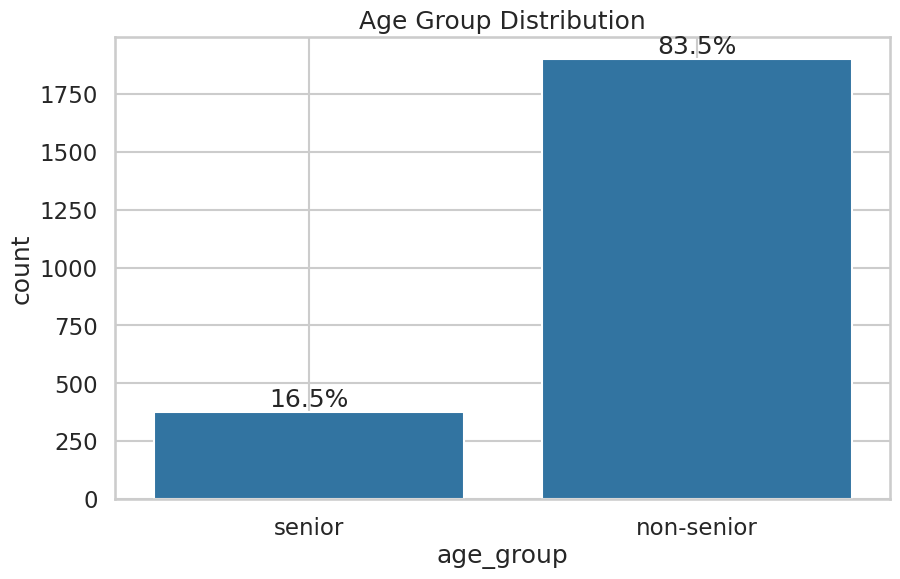

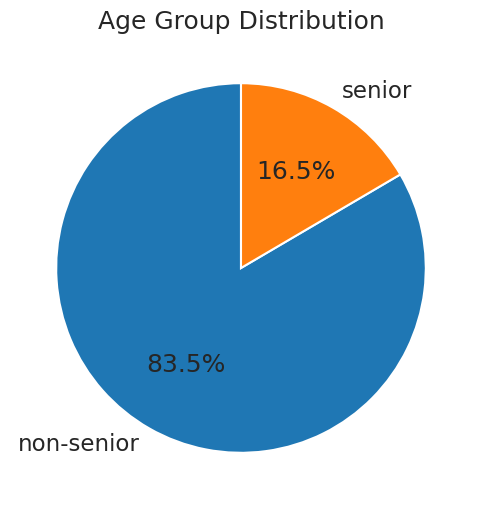

b) Gender Distribution


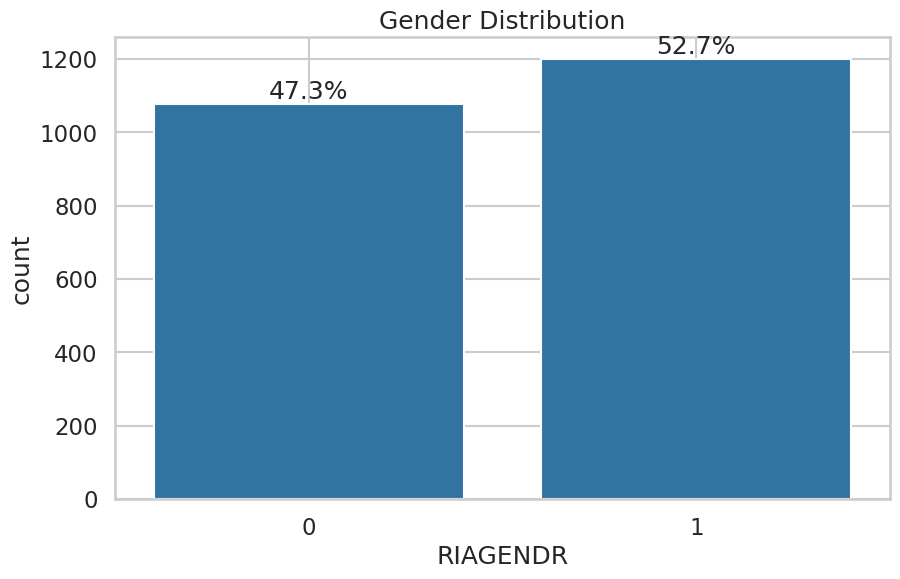

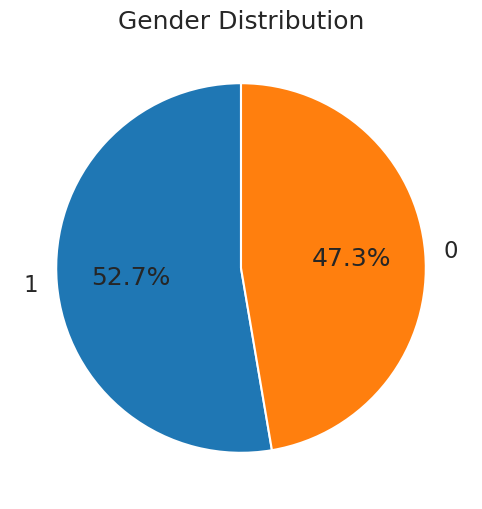

c) Physical Activity (PAQ605)


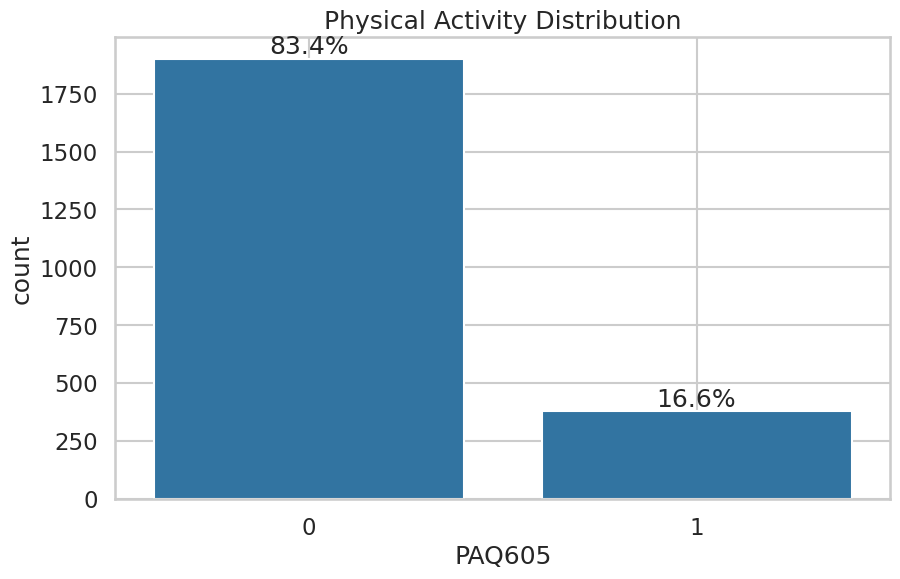

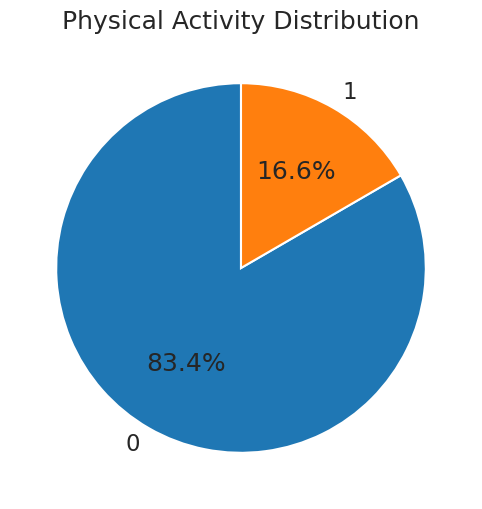

d) Diabetes Indicator (DIQ010)


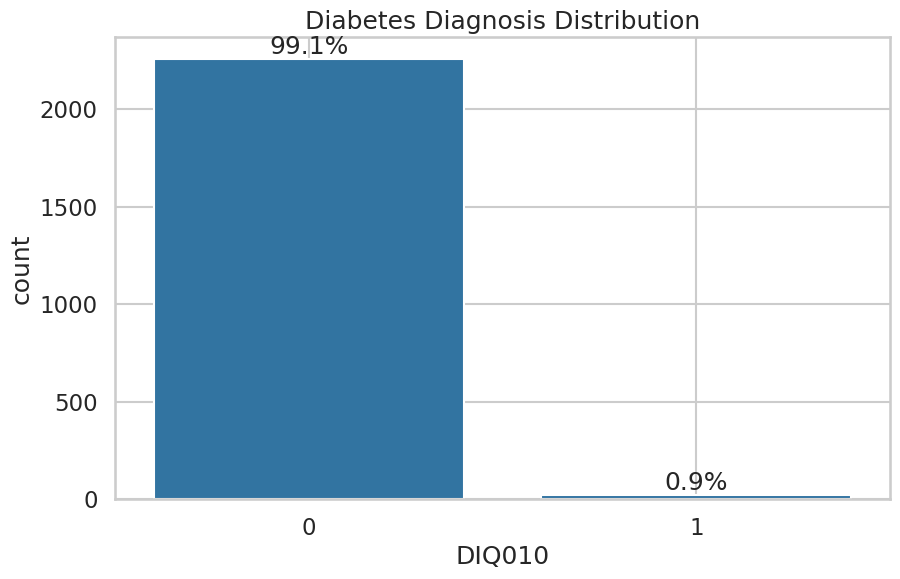

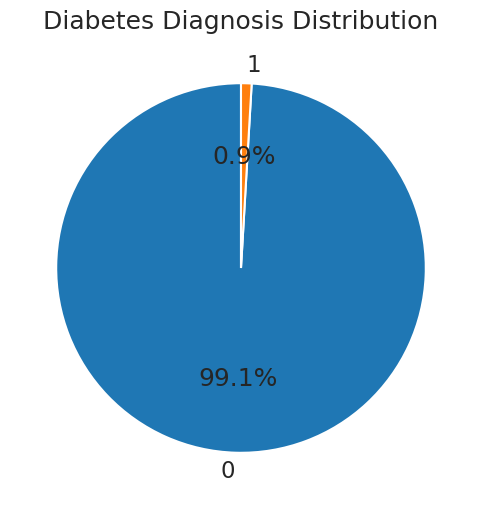

e) Body Mass Index (BMXBMI)


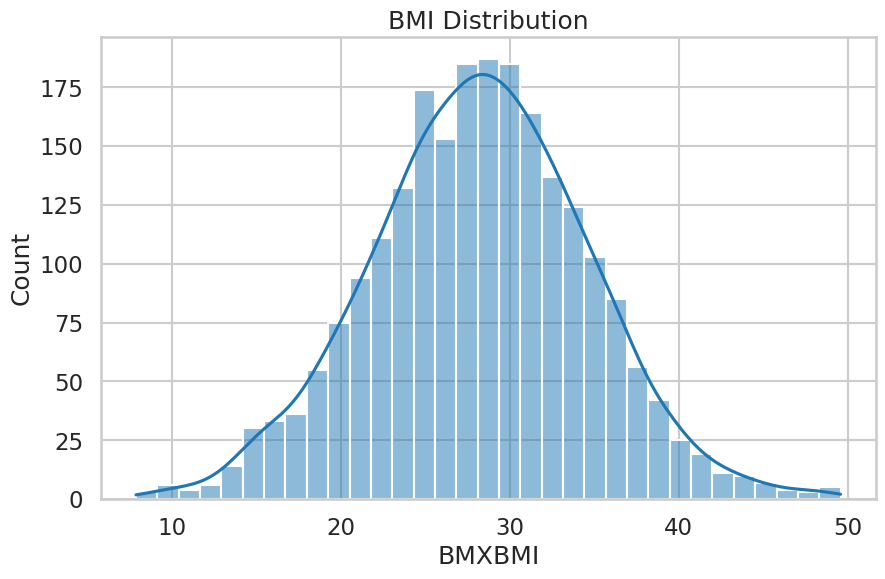

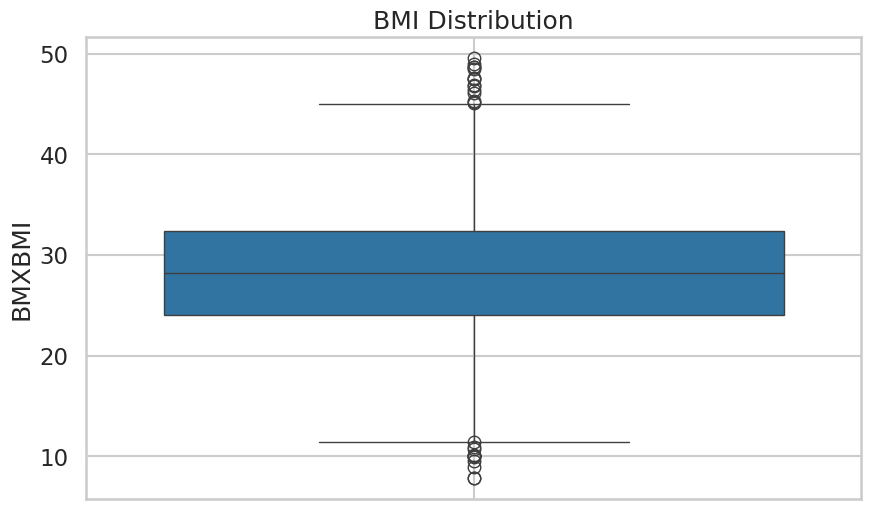

f) Blood Glucose (LBXGLU)


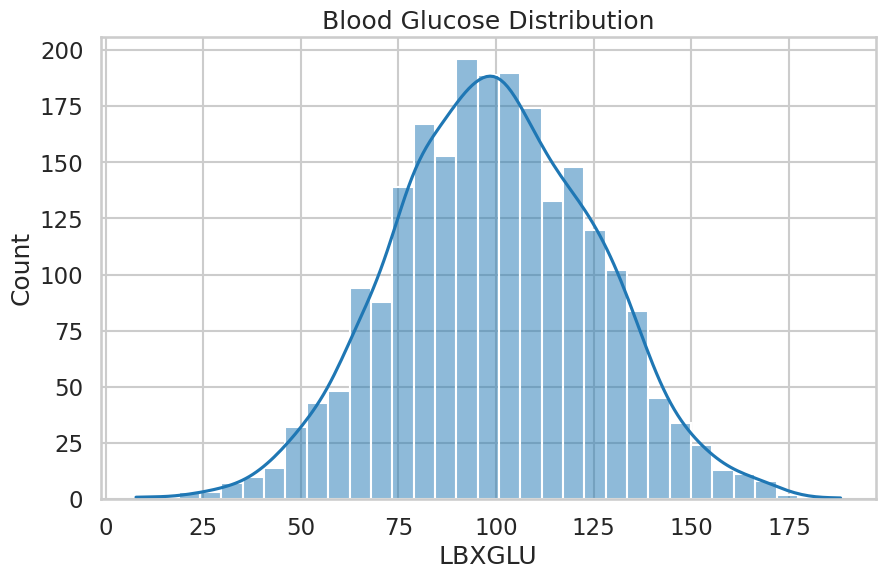

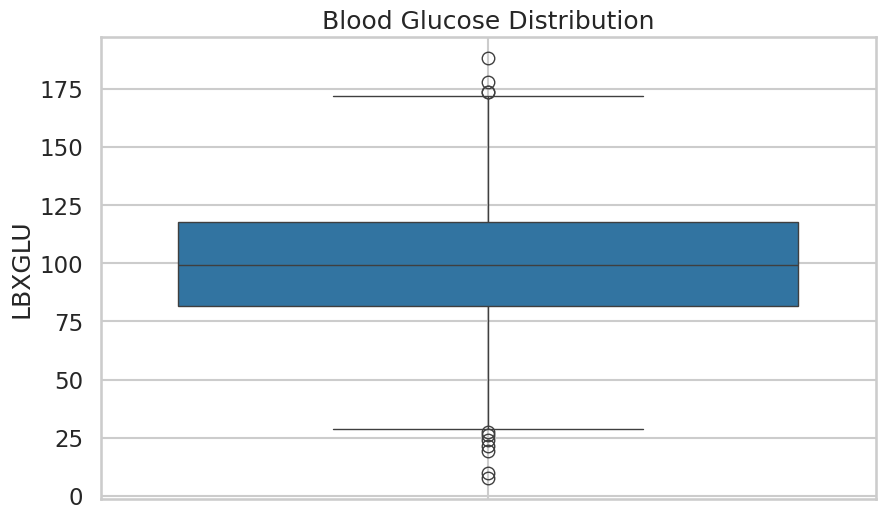

g) Blood Insulin (LBXIN)


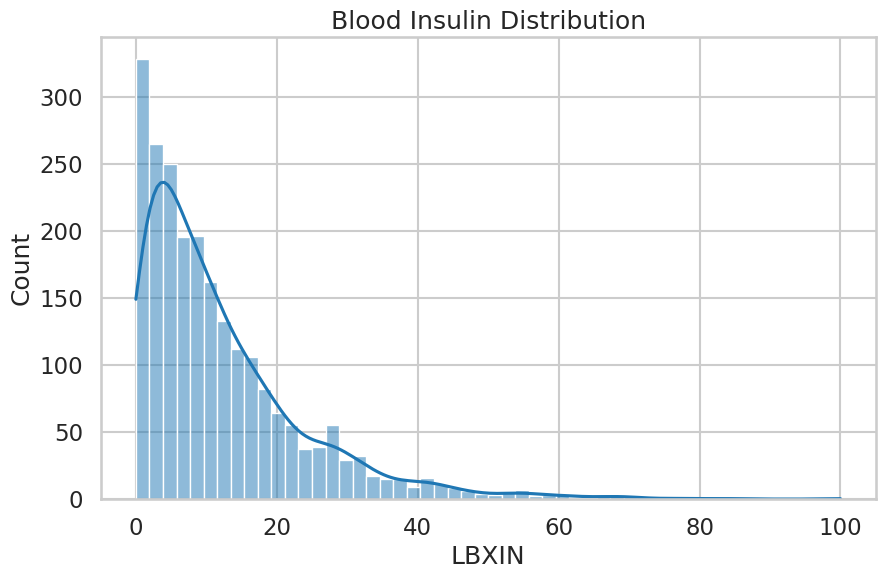

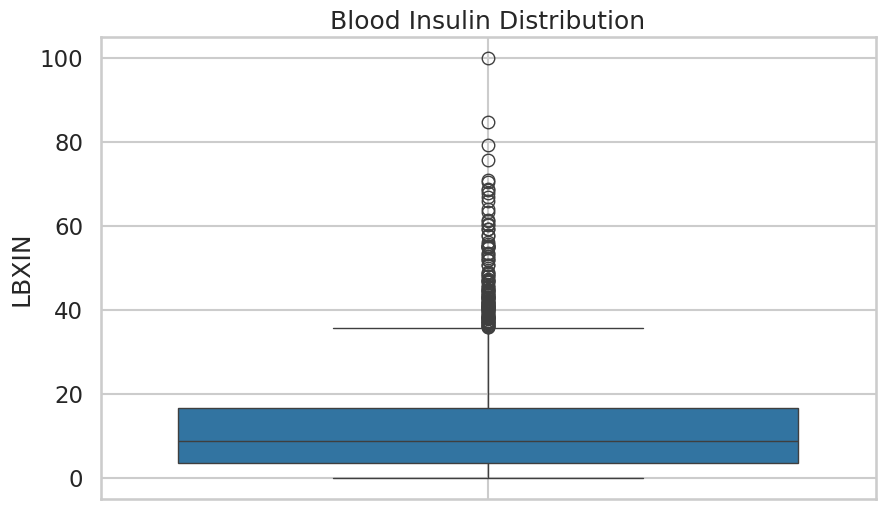

i) Heatmap of Correlation Matrix


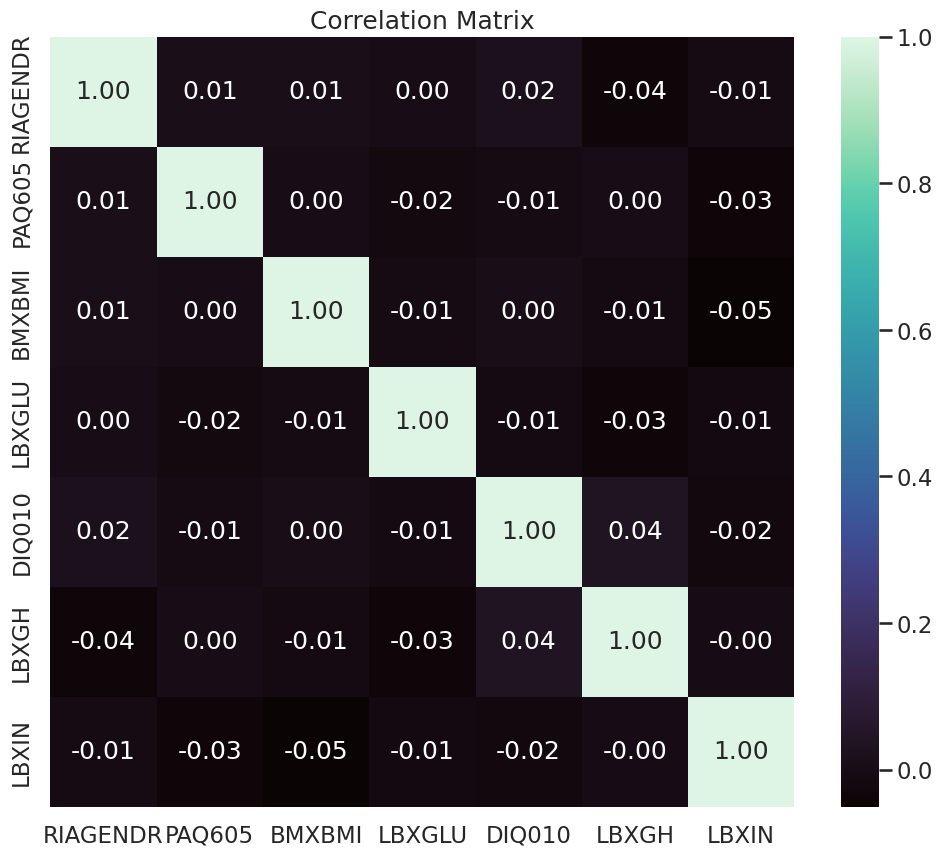

In [ ]:
# Function to create pie charts for categorical columns
def plot_piechart(data, column, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.ylabel('')
    plt.show()

print("\n3.3 Visualizations")
print("a) Age Distribution")
plot_barplot(Y, 'age_group', 'Age Group Distribution')
plot_piechart(Y, 'age_group', 'Age Group Distribution')

print("b) Gender Distribution")
plot_barplot(X, 'RIAGENDR', 'Gender Distribution')
plot_piechart(X, 'RIAGENDR', 'Gender Distribution')

print("c) Physical Activity (PAQ605)")
plot_barplot(X, 'PAQ605', 'Physical Activity Distribution')
plot_piechart(X, 'PAQ605', 'Physical Activity Distribution')

print("d) Diabetes Indicator (DIQ010)")
plot_barplot(X, 'DIQ010', 'Diabetes Diagnosis Distribution')
plot_piechart(X, 'DIQ010', 'Diabetes Diagnosis Distribution')

print("e) Body Mass Index (BMXBMI)")
plot_hist_kde(X, 'BMXBMI', 'BMI Distribution')
plot_boxplot(X, 'BMXBMI', 'BMI Distribution')

print("f) Blood Glucose (LBXGLU)")
plot_hist_kde(X, 'LBXGLU', 'Blood Glucose Distribution')
plot_boxplot(X, 'LBXGLU', 'Blood Glucose Distribution')

print("g) Blood Insulin (LBXIN)")
plot_hist_kde(X, 'LBXIN', 'Blood Insulin Distribution')
plot_boxplot(X, 'LBXIN', 'Blood Insulin Distribution')

print("i) Heatmap of Correlation Matrix")
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

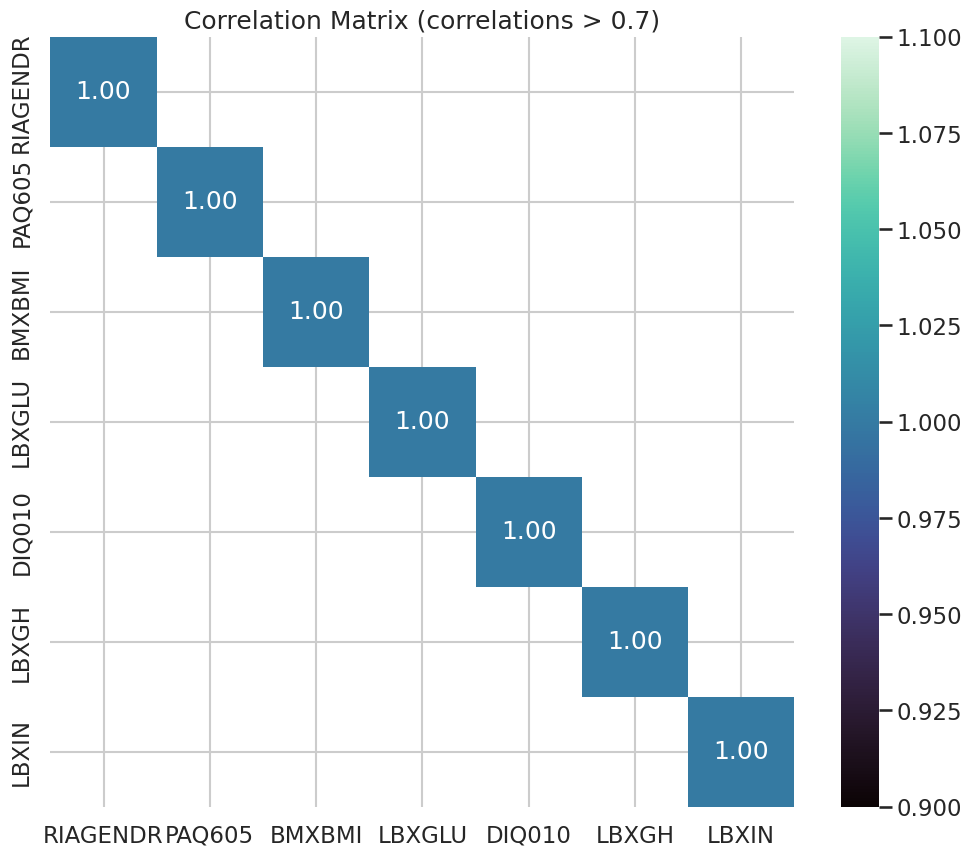

In [ ]:
# Function to highlight highly correlated features (threshold > 0.7)
def highlight_high_correlations(corr_matrix, threshold=0.7):
    plt.figure(figsize=(12, 10))
    mask = np.abs(corr_matrix) < threshold
    sns.heatmap(corr_matrix, annot=True, cmap='mako', mask=mask, fmt='.2f')
    plt.title(f'Correlation Matrix (correlations > {threshold})')
    plt.show()

highlight_high_correlations(corr_matrix, threshold=0.7)

In [ ]:
# 4. Data Preprocessing
print("\n4. Data Preprocessing")
print("4.1 Data Splitting and 4.2 Data Normalization")

# Convert categorical features to numeric if needed
X_numeric = X.copy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, Y['age_group'], test_size=0.2, random_state=42
)


4. Data Preprocessing
4.1 Data Splitting and 4.2 Data Normalization


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split into training and testing sets:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Data split into training and testing sets:
Training set size: 1822 samples
Testing set size: 456 samples


In [ ]:
# 5. Machine Learning Classification
print("\n5. Machine Learning Classification")
print("5.1 Selection of Classification Algorithm and 5.2 Implementation Details")

# Initialize classifiers with parameters from the report
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        class_weight='balanced',
        random_state=42
    ),
    'K-Nearest Neighbours': KNeighborsClassifier(
        n_neighbors=7
    ),
    'Naive Bayes Classifier': GaussianNB(),
    'Support Vector Machine': SVC(
        kernel='rbf',
        class_weight='balanced',
        probability=True,
        random_state=42
    )
}

# Dictionary to store model results
results = {}


5. Machine Learning Classification
5.1 Selection of Classification Algorithm and 5.2 Implementation Details


In [ ]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))




Training Random Forest...
Accuracy: 0.8728
Classification Report:
              precision    recall  f1-score   support

  non-senior       0.87      1.00      0.93       398
      senior       0.50      0.02      0.03        58

    accuracy                           0.87       456
   macro avg       0.69      0.51      0.48       456
weighted avg       0.83      0.87      0.82       456


Training Decision Tree...
Accuracy: 0.7237
Classification Report:
              precision    recall  f1-score   support

  non-senior       0.88      0.79      0.83       398
      senior       0.15      0.24      0.18        58

    accuracy                           0.72       456
   macro avg       0.51      0.52      0.51       456
weighted avg       0.78      0.72      0.75       456


Training K-Nearest Neighbours...
Accuracy: 0.8487
Classification Report:
              precision    recall  f1-score   support

  non-senior       0.87      0.97      0.92       398
      senior       0.13      


6. Results and Inferences
6.1 Outcomes of the Analysis

Accuracy comparison:
               Classifier  Accuracy
0           Random Forest  0.872807
1           Decision Tree  0.723684
2    K-Nearest Neighbours  0.848684
3  Naive Bayes Classifier  0.866228
4  Support Vector Machine  0.517544


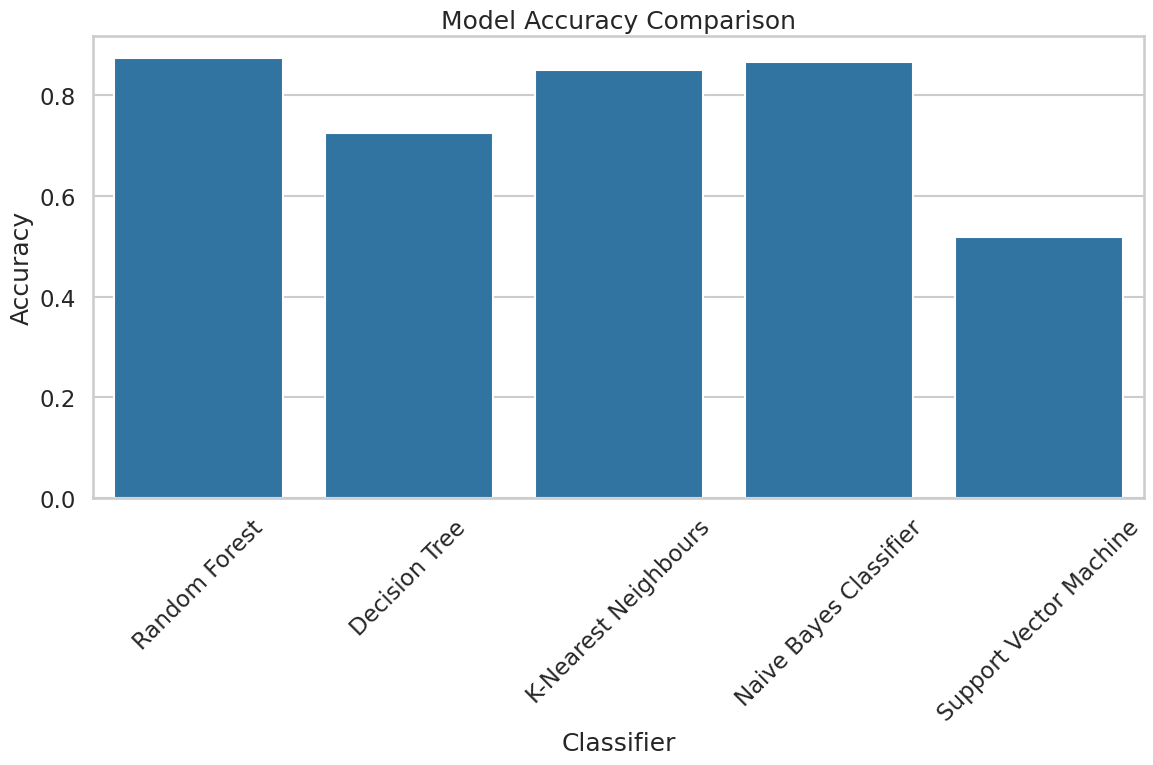

In [ ]:
# 6. Results and Inferences
print("\n6. Results and Inferences")
print("6.1 Outcomes of the Analysis")

# Create a DataFrame for comparison
accuracy_df = pd.DataFrame([
    {'Classifier': name, 'Accuracy': model_results['accuracy']}
    for name, model_results in results.items()
])

print("\nAccuracy comparison:")
print(accuracy_df)

# Plot model accuracies
plt.figure(figsize=(12, 8))
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 7. Conclusion
print("\n7. Conclusion")
print("7.1 Summary of Findings")

# Find the best-performing model
best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Classifier']
best_accuracy = accuracy_df['Accuracy'].max()

print(f"The best-performing model is {best_model} with an accuracy of {best_accuracy:.4f}")
print("See the classification report above for detailed metrics for each class.")

print("\n7.2 Limitations of the Analysis")
print("- Class imbalance affects model performance, especially for minority classes.")
print("- Feature correlations are weak, suggesting potential for feature engineering.")
print("- Outliers in features like blood insulin may influence model predictions.")
print("- Alternative algorithms or ensemble techniques could provide different insights.")
print("- Dataset size and feature selection may limit generalizability.")



7. Conclusion
7.1 Summary of Findings
The best-performing model is Random Forest with an accuracy of 0.8728
See the classification report above for detailed metrics for each class.

7.2 Limitations of the Analysis
- Class imbalance affects model performance, especially for minority classes.
- Feature correlations are weak, suggesting potential for feature engineering.
- Outliers in features like blood insulin may influence model predictions.
- Alternative algorithms or ensemble techniques could provide different insights.
- Dataset size and feature selection may limit generalizability.
